In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles


In [27]:
np.random.seed(42)
x , y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

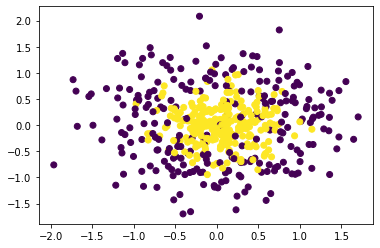

In [29]:
plt.scatter(x[:,0],x[:,1],c=y)

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()
np.mean(cross_val_score(abc,x,y,scoring='accuracy',cv=10))

0.786

In [32]:
abc.fit(x,y)

AdaBoostClassifier()

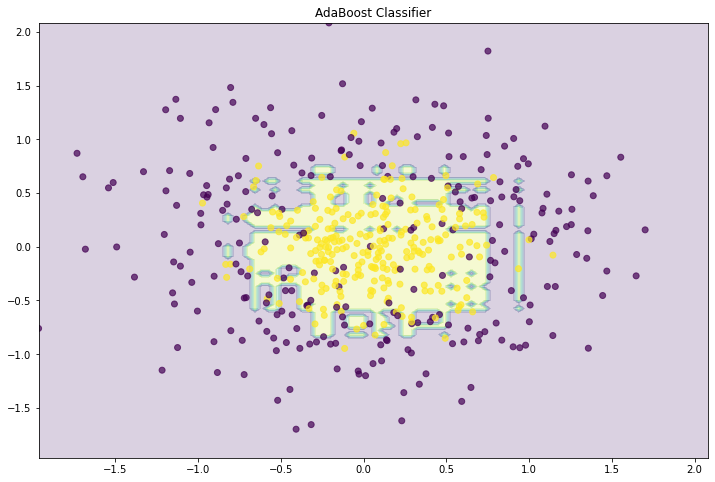

In [43]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12,8))
    x_range = np.linspace(x.min(),x.max(),100)
    xx1, xx2 = np.meshgrid(x_range, x_range)              ######
    y_hat = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])   ######
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1,xx2,y_hat,alpha=0.2)
    plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=0.7)
    plt.title('AdaBoost Classifier')
    plt.show()
    
plot_decision_boundary(abc)

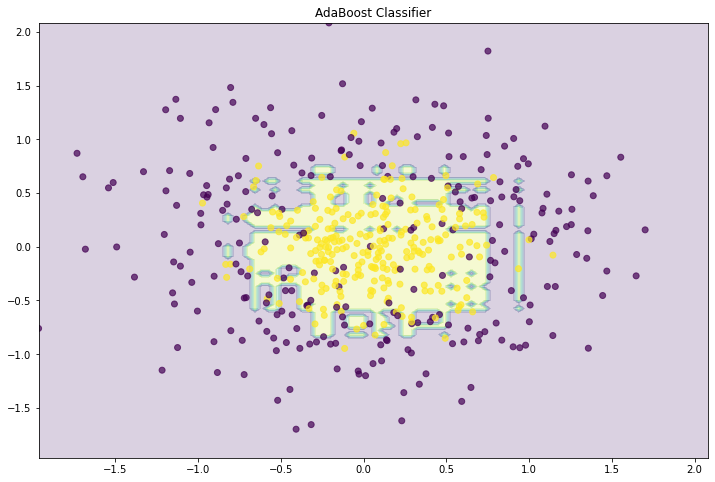

In [44]:
abc = AdaBoostClassifier(n_estimators=500)
abc.fit(x,y)
plot_decision_boundary(abc)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid = dict()

grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] = [0.0001,0.001,0.01,0.1,1.0]
grid['algorithm'] = ['SAMME.R','SAMME']

grid_search = GridSearchCV(abc,param_grid=grid, n_jobs = -1, scoring='accuracy', cv=10)

#execute the grid search
grid_result = grid_search.fit(x,y)

# summarize the best score and best params
print(grid_result.best_score_)
print(grid_result.best_params_)

0.8320000000000001
{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 500}
